In [1]:
import folium as folium
import pandas as pd

In [2]:
# read in the unemployment data so I can get the abbreviations
state_data = pd.read_csv('/Users/austinlasseter/DSI-EC-2/folium/examples/data/US_Unemployment_Oct2012.csv')

In [3]:
# get the abbreviations of the states
abbreviations=list(state_data.State)

In [4]:
# read in the SAT data
df_sat=pd.read_csv('../data/sat.csv')

In [5]:
# Convert the 'participation' column to an integer by getting rid of the %
df_sat['Participate'] = df_sat['Participation'].str[:-1]
df_sat.drop(['Participation'], axis=1, inplace=True)
df_sat['Participate']=pd.to_numeric(df_sat['Participate'], errors='coerce')
print(df_sat['Participate'].dtypes)

int64


In [6]:
df_sat.columns

Index(['Unnamed: 0', 'State', 'Evidence-Based Reading and Writing', 'Math',
       'Total', 'Participate'],
      dtype='object')

In [7]:
df_sat

,Unnamed: 0,State,Evidence-Based Reading and Writing,Math,Total,Participate
0,0,Alabama,593,572,1165,5
1,1,Alaska,547,533,1080,38
2,2,Arizona,563,553,1116,30
3,3,Arkansas,614,594,1208,3
4,4,California,531,524,1055,53
5,5,Colorado,606,595,1201,11
6,6,Connecticut,530,512,1041,100
7,7,Delaware,503,492,996,100
8,8,District of Columbia,482,468,950,100
9,9,Florida,520,497,1017,83


In [8]:
# Need to drop DC because it won't jive with my map (boo hoo) and set a new index
df_sat=df_sat[df_sat.State != 'District of Columbia']
df_sat.reset_index(drop=True, inplace=True)

In [9]:
# convert the abbreviations to a df, then concat as a new column
abb=pd.DataFrame(abbreviations)
sat=pd.concat([df_sat, abb], axis=1)

In [10]:
sat

,Unnamed: 0,State,Evidence-Based Reading and Writing,Math,Total,Participate,0
0,0,Alabama,593,572,1165,5,AL
1,1,Alaska,547,533,1080,38,AK
2,2,Arizona,563,553,1116,30,AZ
3,3,Arkansas,614,594,1208,3,AR
4,4,California,531,524,1055,53,CA
5,5,Colorado,606,595,1201,11,CO
6,6,Connecticut,530,512,1041,100,CT
7,7,Delaware,503,492,996,100,DE
8,9,Florida,520,497,1017,83,FL
9,10,Georgia,535,515,1050,61,GA


In [11]:
# let's drop the columns we don't need:
sat.drop(['Unnamed: 0', 'State', 'Evidence-Based Reading and Writing', 'Math',
       'Total'], axis=1, inplace=True)
sat.columns

Index(['Participate', 0], dtype='object')

In [12]:
# Let's drop state, and then rename that column with no name:
sat.rename(columns = {0: 'State'}, inplace=True);
sat

,Participate,State
0,5,AL
1,38,AK
2,30,AZ
3,3,AR
4,53,CA
5,11,CO
6,100,CT
7,100,DE
8,83,FL
9,61,GA


In [13]:
# oops, it looks like our participation is an integer but we need it to be float.
print(sat.dtypes)
sat['Participate'] = sat['Participate'].astype(float)
sat.dtypes
# Much better.

Participate     int64
State          object
dtype: object


Participate    float64
State           object
dtype: object

In [14]:
# Read in our map:
state_geo = '/Users/austinlasseter/DSI-EC-2/folium/examples/data/us-states.json'

In [15]:
#Let Folium determine the scale
map = folium.Map(location=[48, -102], zoom_start=3)

In [16]:
# Mr. Sulu, fire photon torpedoes!
map.choropleth(geo_data=state_geo, data=sat,
             columns=['State', 'Participate'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Participation Rate (%)')
map
# Sweet.

In [17]:
# Let's make sure that matches what we expected:
sat.sort_values('Participate',ascending=False)

,Participate,State
21,100.0,MI
6,100.0,CT
7,100.0,DE
28,96.0,NH
18,95.0,ME
11,93.0,ID
8,83.0,FL
20,76.0,MA
38,71.0,RI
29,70.0,NJ


# Do it all over again, for the ACT

In [18]:
# Okay, now let's do the ACT map.
df_act=pd.read_csv('../data/act.csv')

In [19]:
# Convert the 'participation' column to an integer by getting rid of the %
df_act['Participate'] = df_act['Participation'].str[:-1]
df_act.drop(['Participation'], axis=1, inplace=True)
df_act['Participate']=pd.to_numeric(df_act['Participate'], errors='coerce')

In [20]:
# Need to drop DC and "National" because it won't jive with my map, and set a new index
df_act=df_act[df_act.State != 'District of Columbia']
df_act=df_act[df_act.State != 'National']
df_act.reset_index(drop=True, inplace=True)

In [21]:
# convert the abbreviations to a df, then concat as a new column
abb=pd.DataFrame(abbreviations)
act=pd.concat([df_act, abb], axis=1)

In [22]:
# tell me how many columns we have again?
act.columns

Index([ 'Unnamed: 0',       'State',     'English',        'Math',
           'Reading',     'Science',   'Composite', 'Participate',
                   0],
      dtype='object')

In [23]:
# let's drop the columns we don't need:
act.drop(['Unnamed: 0', 'State', 'English',        'Math',
           'Reading',     'Science',   'Composite'], axis=1, inplace=True)
act.columns

Index(['Participate', 0], dtype='object')

In [24]:
# Let's drop state, and then rename that column with no name:
act.rename(columns = {0: 'State'}, inplace=True);
act

,Participate,State
0,100,AL
1,65,AK
2,62,AZ
3,100,AR
4,31,CA
5,100,CO
6,31,CT
7,18,DE
8,73,FL
9,55,GA


In [25]:
# oops, it looks like our participation is an integer but we need it to be float.
print(act.dtypes)
act['Participate'] = act['Participate'].astype(float)
act.dtypes
# Much better.

Participate     int64
State          object
dtype: object


Participate    float64
State           object
dtype: object

In [26]:
# Read in our map:
state_geo = '/Users/austinlasseter/DSI-EC-2/folium/examples/data/us-states.json'

In [42]:
#Let Folium determine the scale
map = folium.Map(location=[48, -102], zoom_start=3)

In [39]:
# Mr. Sulu, fire photon torpedoes!
map.choropleth(geo_data=state_geo, data=act,
             columns=['State', 'Participate'],
             key_on='feature.id',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Participation Rate (%)')
map
# Sweet.

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [30]:
len(sat.State)

50

In [31]:
sat.sort_values(['Participate'], ascending = False, inplace=True)
sat

,Participate,State
21,100.0,MI
6,100.0,CT
7,100.0,DE
28,96.0,NH
18,95.0,ME
11,93.0,ID
8,83.0,FL
20,76.0,MA
38,71.0,RI
29,70.0,NJ


In [32]:
print(sat['Participate'].median())
print(sat['Participate'].mean())

34.0
38.6


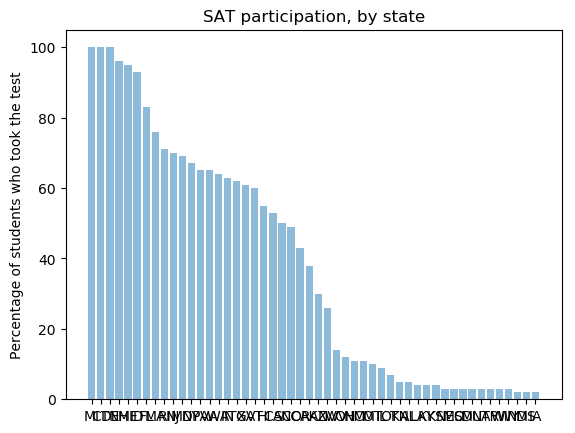

In [33]:
# Create a histogram of SAT participation rates
y_pos = np.arange(len(sat.State))
 
plt.bar(y_pos, sat.Participate, align='center', alpha=0.5)
plt.xticks(y_pos, sat.State)
plt.ylabel('Percentage of students who took the test')
plt.title('SAT participation, by state')
 
plt.show()

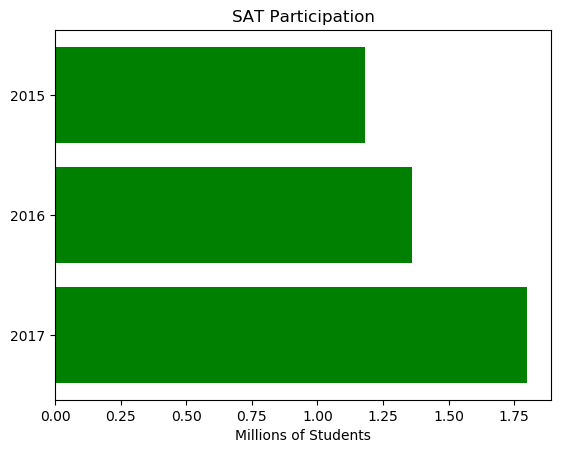

In [34]:
# Create a bar chart of SAT participation over the last 3 years

import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
years = ('2015', '2016', '2017')
y_pos = np.arange(len(years))
performance = (1.18, 1.36, 1.8)

ax.barh(y_pos, performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(years)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Millions of Students')
ax.set_title('SAT Participation')

plt.show()

In [35]:
# mean ACT_Participate     65.254902
# mean SAT_Participate     39.803922
# std ACT_Participate    32.140842
# std SAT_Participate    35.276632
drinks.continent.value_counts().plot(kind='bar')

NameError: name 'drinks' is not defined

In [ ]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 1
act_means = (65.25)
act_std = (32.1)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

sat_means = (39.8)
sat_std = (35.27)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent')
ax.set_title('2017 Test Participation')

ax.legend((rects1[0], rects2[0]), ('ACT', 'SAT'))


plt.show()